Objective: The main objective of this project is to design and implement a robust data preprocessing system that addresses common challenges such as missing values, outliers, inconsistent formatting, and noise. By performing effective data preprocessing, the project aims to enhance the quality, reliability, and usefulness of the data for machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

In [2]:
df_emp=pd.read_csv("Employee.csv")# Data set loading
df_emp

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


### Data Exploration: 

In [3]:
print("No. of elements in this dataset is ",df_emp.size)

No. of elements in this dataset is  888


In [4]:
df_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [5]:
# Data Exploration
# Print actual unique values for each feature
for column in df_emp.columns:
    unique_vals = df_emp[column].unique()
    length = len(unique_vals)
    print(f"Feature: {column}")
    print(f"Unique values: {unique_vals}")
    print(f"Number of unique values: {length}\n")
    print(f"Unique values in {column}: {unique_vals}")



Feature: Company
Unique values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of unique values: 7

Unique values in Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Feature: Age
Unique values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of unique values: 30

Unique values in Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Feature: Salary
Unique values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of unique values: 41

Unique values in Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 304

In [6]:
df_emp['Company'] = df_emp['Company'].map({'Tata Consultancy Services':'TCS','Congnizant': 'CTS','Infosys Pvt Lmt': 'Infosys'}).fillna(df_emp['Company'])
print("Renamed Company names and value counts \n", df_emp["Company"].value_counts())

Renamed Company names and value counts 
 Company
TCS        55
Infosys    47
CTS        38
Name: count, dtype: int64


In [7]:
df_emp.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


#### Data Cleaning

In [8]:
df_emp[df_emp.duplicated()]

,Company,Age,Salary,Place,Country,Gender
84,CTS,43.0,NaN,Mumbai,India,0
130,TCS,21.0,4824.0,Mumbai,India,0
131,Infosys,NaN,5835.0,Mumbai,India,0
144,Infosys,22.0,8787.0,Calcutta,India,1


In [9]:
df_emp.drop_duplicates(inplace=True)
df_emp[df_emp.duplicated()]

,Company,Age,Salary,Place,Country,Gender


In [10]:
df_emp['Age'].replace(0, np.nan, inplace=True) # Replace 0 in age with NaN
df_emp.drop_duplicates(inplace=True)  # Remove duplicate rows
df_emp

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [11]:
d_mean=df_emp["Salary"].mean()
d_mean


5283.471074380165

In [12]:
df_emp['Salary'].describe()

count     121.000000
mean     5283.471074
std      2585.373600
min      1089.000000
25%      3030.000000
50%      5000.000000
75%      8000.000000
max      9876.000000
Name: Salary, dtype: float64

In [13]:
#IQR
q1,q2,q3=df_emp.Age.quantile([0.25,0.50,0.75]) #Q1,Q2,Q3
print("25 percentile = {}, 50 percentile = {}, 75 percentile = {}".format(q1,q2,q3))
IQR=q3-q1
print("IQR = ",IQR)
LW=q1-1.5*IQR # Lower Whisker
UW=q3+1.5*IQR # Upper Whisker
print("Lower Whisker = {}  Upper Whisker = {}".format(LW,UW ))
df_emp[(df_emp["Age"]<LW)|(df_emp["Age"]>UW)]

25 percentile = 23.0, 50 percentile = 33.0, 75 percentile = 40.0
IQR =  17.0
Lower Whisker = -2.5  Upper Whisker = 65.5


,Company,Age,Salary,Place,Country,Gender


There is no outlayers so we can replace the Nan values by mean salary.


In [14]:
df_emp=df_emp.fillna(value={'Salary':d_mean})
print(df_emp.info())

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  136 non-null    object 
 1   Age      121 non-null    float64
 2   Salary   144 non-null    float64
 3   Place    130 non-null    object 
 4   Country  144 non-null    object 
 5   Gender   144 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.9+ KB
None


### Data Analysis

In [15]:
filtered_data = df_emp[(df_emp['Age'] > 40) & (df_emp['Salary'] < 5000)]
filtered_data


,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


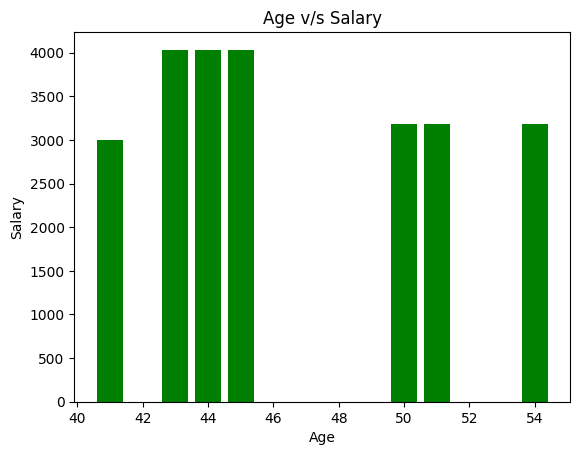

In [16]:
plt.bar(filtered_data["Age"],filtered_data["Salary"],color='g')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age v/s Salary')
plt.show()

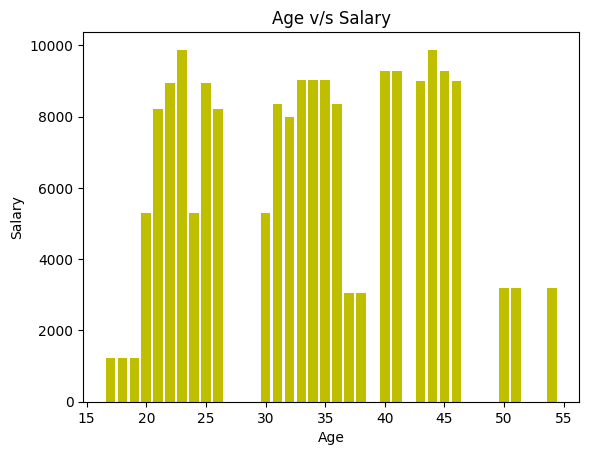

In [17]:
plt.bar(df_emp['Age'],df_emp['Salary'],color='y')
plt.xlabel("Age")
plt.ylabel('Salary')
plt.title('Age v/s Salary')
plt.show()

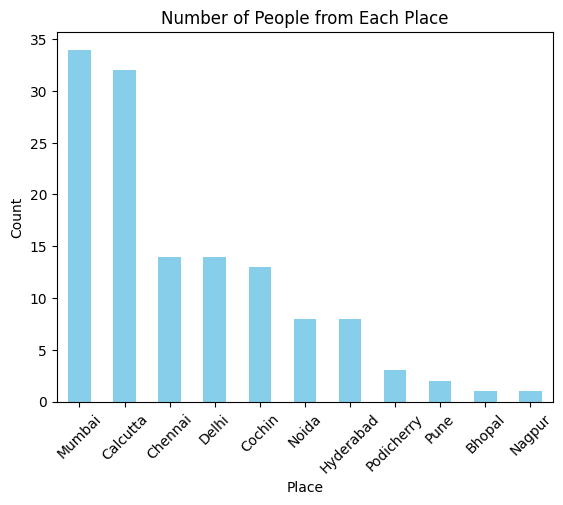

In [18]:
# Count people from each place and represent it visually
place_counts = df_emp['Place'].value_counts()
place_counts.plot(kind='bar', rot=45, color='skyblue')
plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Number of People from Each Place')
plt.show()

#### Data Encoding

In [19]:
#one-hot encoding for the 'Company' and 'Place' column
df_one_hot_encoded = pd.get_dummies(data = df_emp, columns = ["Company", "Place"])

print(df_one_hot_encoded )

      Age       Salary Country  Gender  Company_CTS  Company_Infosys  \
0    20.0  5283.471074   India       0        False            False   
1    30.0  5283.471074   India       0        False             True   
2    35.0  2300.000000   India       0        False            False   
3    40.0  3000.000000   India       0        False             True   
4    23.0  4000.000000   India       0        False            False   
..    ...          ...     ...     ...          ...              ...   
142  22.0  8202.000000   India       0        False             True   
143  33.0  9024.000000   India       1        False            False   
145  44.0  4034.000000   India       1        False             True   
146  33.0  5034.000000   India       1        False            False   
147  22.0  8202.000000   India       0        False             True   

     Company_TCS  Place_Bhopal  Place_Calcutta  Place_Chennai  Place_Cochin  \
0           True         False           False          

In [23]:

#Label Encoding
label_encoder = LabelEncoder()
for i in df_emp[["Company","Place"]]:
    df_emp[i] = label_encoder.fit_transform(df_emp[i])
print(df_emp)




     Company   Age       Salary  Place Country  Gender
0          2  20.0  5283.471074      2   India       0
1          1  30.0  5283.471074      6   India       0
2          2  35.0  2300.000000      1   India       0
3          1  40.0  3000.000000      4   India       0
4          2  23.0  4000.000000      6   India       0
..       ...   ...          ...    ...     ...     ...
142        1  22.0  8202.000000      6   India       0
143        2  33.0  9024.000000      1   India       1
145        1  44.0  4034.000000      4   India       1
146        2  33.0  5034.000000      6   India       1
147        1  22.0  8202.000000      3   India       0

[144 rows x 6 columns]


#### Feature Scaling

In [29]:
scaler_standard = StandardScaler() #Create a scaler object
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(df_emp[['Age', 'Salary']]), columns=['Age', 'Salary'])#Transform the data
print(df_standard_scaled.round(2))# Print the data

      Age  Salary
0   -1.35    0.00
1   -0.23    0.00
2    0.33   -1.26
3    0.89   -0.97
4   -1.01   -0.54
..    ...     ...
139 -1.12    1.24
140  0.11    1.58
141  1.34   -0.53
142  0.11   -0.11
143 -1.12    1.24

[144 rows x 2 columns]


In [34]:
# MinMaxScaler
scaler_minmax = MinMaxScaler()# Create a scaler object
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df_emp[['Age', 'Salary']]), columns=['Age', 'Salary'])# Transform the data
print(df_minmax_scaled.round(2))# Print the scaled data

      Age  Salary
0    0.08    0.48
1    0.35    0.48
2    0.49    0.14
3    0.62    0.22
4    0.16    0.33
..    ...     ...
139  0.14    0.81
140  0.43    0.90
141  0.73    0.34
142  0.43    0.45
143  0.14    0.81

[144 rows x 2 columns]
